In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Dataset/train_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 436 images belonging to 2 classes.


In [4]:
test_dataset = test.flow_from_directory("/content/drive/MyDrive/Dataset/test_set",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [6]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [7]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [8]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [12]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
14/14 [==============================] - 155s 11s/step - loss: 0.6259 - accuracy: 0.6651 - val_loss: 0.5109 - val_accuracy: 0.7107
Epoch 2/5
14/14 [==============================] - 17s 1s/step - loss: 0.3964 - accuracy: 0.8211 - val_loss: 0.2580 - val_accuracy: 0.9008
Epoch 3/5
14/14 [==============================] - 18s 1s/step - loss: 0.3393 - accuracy: 0.8716 - val_loss: 0.1321 - val_accuracy: 0.9752
Epoch 4/5
14/14 [==============================] - 17s 1s/step - loss: 0.1732 - accuracy: 0.9381 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 5/5
14/14 [==============================] - 18s 1s/step - loss: 0.1445 - accuracy: 0.9450 - val_loss: 0.0550 - val_accuracy: 0.9752


In [13]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 4s 901ms/step


In [14]:
predictions

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

In [15]:
print(len(predictions))

121


In [16]:
model.save("/content/forest1.h5")

In [17]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [18]:
model = load_model("/content/forest1.h5")

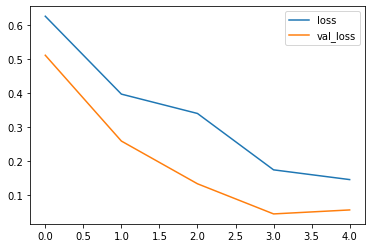

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

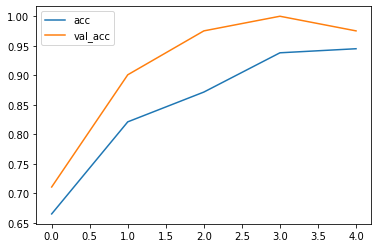

In [20]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [21]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(128,128))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  val=model.predict(x)
  print(val)
  if val==0:
    plt.xlabel(" NO fire",fontsize=30)
  elif val==1:
    plt.xlabel("fire",fontsize=30)

1/1 [==============================] - 0s 53ms/step
[[1.]]


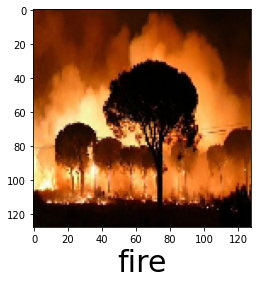

In [33]:
predictImage("/content/drive/MyDrive/Dataset/test_set/with fire/image.jpg")

1/1 [==============================] - 0s 20ms/step
[[0.]]


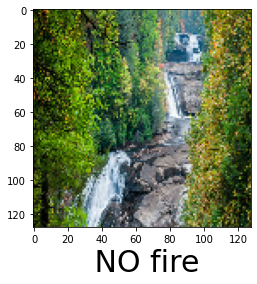

In [34]:
predictImage("/content/drive/MyDrive/Dataset/test_set/forest/Dupont_Forest_Triple_Falls_Rob_Travis_2_1.jpg")


In [24]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 20.2 MB/s 


In [25]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=ac3eca8a607f055d7f1ea0aabbdf0ff74449528e95e1686c2088f255e6c09274
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [26]:
pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [28]:
#load the saved model
model = load_model(r'/content/forest1.h5')
#define video
video = cv2.VideoCapture('/content/drive/MyDrive/Forest_fire.mp4')
#define the features
name = ['forest','with forest']